# Importing Libraries

In [1]:
#Import Libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Displaying Images

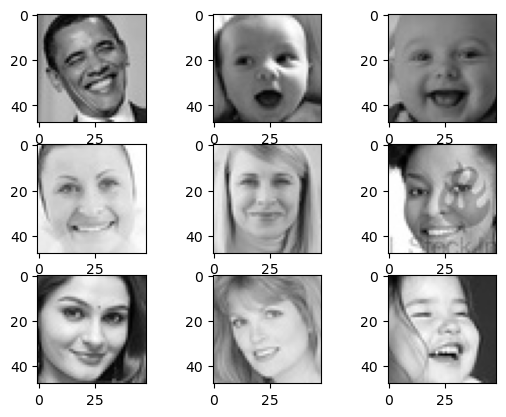

In [2]:
#Load the Images -
folder_name = 'happy'
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("C:/Users/om/Desktop/images/train/"+ folder_name +"/"+ os.listdir("C:/Users/om/Desktop/images/train/" + folder_name)[i], target_size=(48,48))
    plt.imshow(img)   
plt.show()

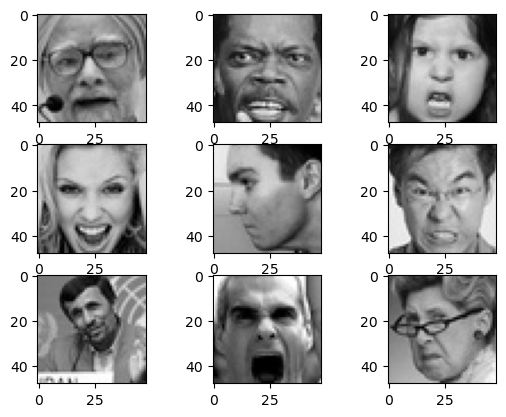

In [3]:
#Load the Images -
folder_name = 'angry'
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("C:/Users/om/Desktop/images/train/"+ folder_name +"/"+ os.listdir("C:/Users/om/Desktop/images/train/" + folder_name)[i], target_size=(48,48))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [4]:
#Load the dataset for training and testing -
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_data =datagen_train.flow_from_directory("C:/Users/om/Desktop/images/train",target_size =(48,48),color_mode ="grayscale",batch_size=128,class_mode='categorical',shuffle=True)
test_data =datagen_val.flow_from_directory("C:/Users/om/Desktop/images/validation",target_size =(48,48),color_mode ="grayscale",batch_size=128,class_mode='categorical',shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [5]:
#Create object for the algorithm -
model = Sequential()
#1st CNN and Pooling layer -
model.add(Conv2D(64,(3,3),padding ='same',activation='relu',input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#2nd CNN and Pooling layer -
model.add(Conv2D(128,(5,5),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#3rd CNN and Pooling layer -
model.add(Conv2D(512,(3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#4th CNN and Pooling layer -
model.add(Conv2D(512,(3,3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Adding Flattening Layer -
model.add(Flatten())
#Fully connected 1st ANN layer -
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Fully connected layer 2nd ANN layer -
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Adding Output Layer -
model.add(Dense(7,activation='softmax'))
#Compiling the Model -
model.compile(optimizer=Adam(lr = 0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

C:\Users\om\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
#Applying the Early Stopping (Activated When Monitored Metrics stop Improving) -
checkpoint=ModelCheckpoint("./EmotionDetectionModel.h5",monitor='val_acc',verbose=1, save_best_only=True, mode='max')
early_stopping =EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_lr =ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_lr]

# Fitting the Model with Training and Validation Data 

In [7]:
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])

In [8]:
history=model.fit_generator(generator=train_data,steps_per_epoch=train_data.n//train_data.batch_size,epochs=20,
                    validation_data=test_data,validation_steps = test_data.n//test_data.batch_size,callbacks=callbacks_list)

C:\Users\om\AppData\Local\Temp\ipykernel_17352\723702612.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_data,steps_per_epoch=train_data.n//train_data.batch_size,epochs=20,


Epoch 1/20
225/225 [==============================] - 1026s 5s/step - loss: 2.0118 - accuracy: 0.2649 - val_loss: 1.6963 - val_accuracy: 0.3550 - lr: 0.0010
Epoch 2/20
225/225 [==============================] - 700s 3s/step - loss: 1.5827 - accuracy: 0.4028 - val_loss: 1.4990 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 3/20
225/225 [==============================] - 653s 3s/step - loss: 1.3647 - accuracy: 0.4820 - val_loss: 1.3559 - val_accuracy: 0.4864 - lr: 0.0010
Epoch 4/20
225/225 [==============================] - 678s 3s/step - loss: 1.2358 - accuracy: 0.5299 - val_loss: 1.2535 - val_accuracy: 0.5185 - lr: 0.0010
Epoch 5/20
225/225 [==============================] - 727s 3s/step - loss: 1.1453 - accuracy: 0.5631 - val_loss: 1.1741 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 6/20
225/225 [==============================] - 700s 3s/step - loss: 1.0802 - accuracy: 0.5879 - val_loss: 1.2071 - val_accuracy: 0.5476 - lr: 0.0010
Epoch 7/20
225/225 [==============================] - 769s 3s/s

In [9]:
#Prediction -
prediction = model.predict(test_data)
prediction

56/56 [==============================] - 43s 716ms/step


array([[2.40298212e-01, 1.91911915e-03, 3.55116576e-02, ...,
        3.64976525e-01, 2.67654777e-01, 2.17427034e-04],
       [2.89759357e-02, 1.81949465e-04, 2.66702503e-01, ...,
        2.09572151e-01, 4.68504876e-01, 5.02709532e-03],
       [8.89422297e-01, 4.91960533e-03, 2.47924905e-02, ...,
        2.54288465e-02, 4.43968512e-02, 7.77497655e-04],
       ...,
       [2.99665332e-03, 1.85150668e-04, 1.83606390e-02, ...,
        2.91374279e-04, 2.90634693e-04, 9.77241874e-01],
       [1.55510325e-02, 1.16723508e-03, 4.23740953e-01, ...,
        4.75289673e-02, 8.84162635e-02, 4.46737781e-02],
       [3.30743147e-03, 8.82772656e-05, 7.63382390e-02, ...,
        2.02514711e-04, 5.35976375e-04, 8.97226155e-01]], dtype=float32)

# Plotting Accuracy & Loss

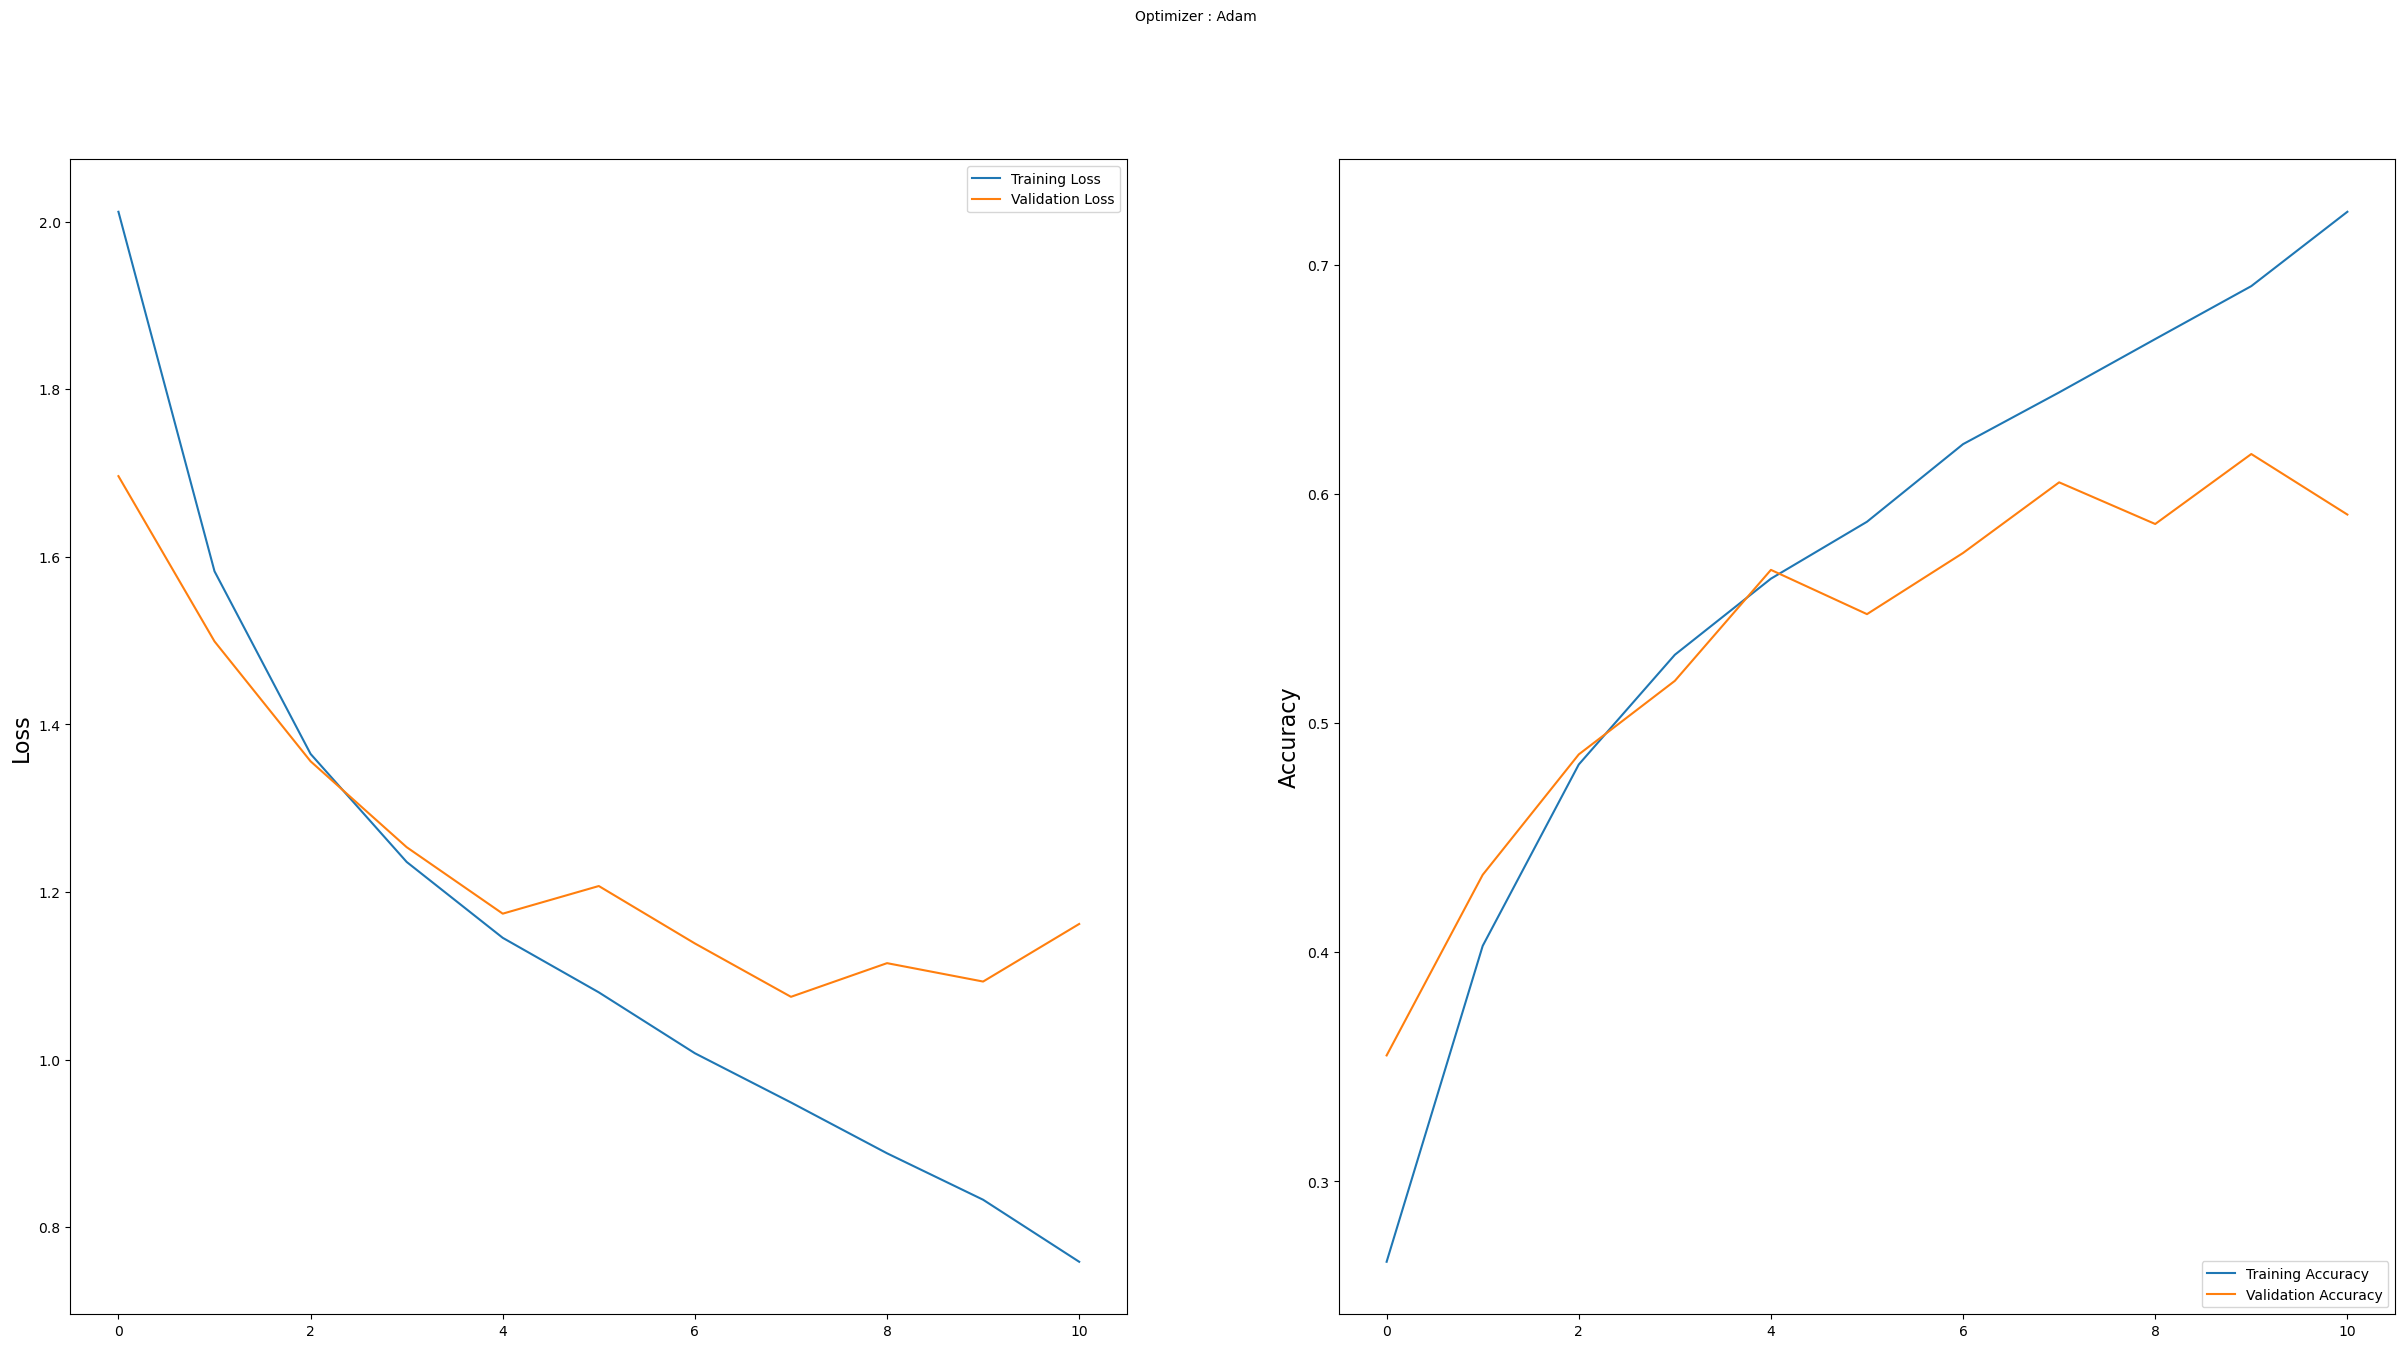

In [10]:
plt.figure(figsize=(30,15))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [17]:
#Lets Save the Training model file in .h5 format -
model.save('EmotionDetectionModel.h5')